<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting/blob/main/Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pytz
tz_NY = pytz.timezone('Asia/Kolkata')
datetime_NY = datetime.datetime.now(tz_NY)
print("Run date time (IST):", datetime_NY.strftime("%Y-%m-%d %H:%M:%S"))

gen_output = 0

Run date time (IST): 2024-02-07 09:42:07


In [2]:
# install libraries
!pip install yfinance
!pip install pandas-ta
#!pip install talib-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=da6dcc27e06363b830b93596dd46186cd0a58d27a7664639ee7bc20827c920cd
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
#import talib
yfin.pdr_override()
import pandas_ta as ta

from google.colab import data_table

In [4]:
# set start and end date
start_date = (datetime.date.today() + datetime.timedelta(days=-10*365)).strftime('%Y-%m-%d')
start1_date = (datetime.date.today() + datetime.timedelta(days=-1*365)).strftime('%Y-%m-%d')
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [5]:
# fetch nse indices scrips

import pandas as pd
import numpy as np

df_nse_sectors = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting/main/data/NSE_Sectors_Indices.csv')

In [6]:
sectors = df_nse_sectors['Sector'].unique()
df_sectors = pd.DataFrame()
for sector in sectors:
  stocks = df_nse_sectors[df_nse_sectors['Sector'] == sector]['Symbol'].values
  df_sector = pd.DataFrame()
  tweight = 0
  for stock in stocks:
    stock_df = yfin.Ticker(stock+'.NS').history(period='5y', interval='1d')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
    col = ['Close']
    stock_df = stock_df[col]
    stock_df['Split'] = 1
    weight = df_nse_sectors[df_nse_sectors['Symbol'] == stock]['Weight'].values[0]
    tweight = sum(df_nse_sectors[df_nse_sectors['Sector'] == sector]['Weight'].values)
    if stock == 'NESTLEIND':
      stock_df.loc[stock_df.index < '2024-01-01', 'Split'] = 10
    #stock_df[stock] = (stock_df[col]*weight)/(tweight*stock_df['Split'].values[0])
    stock_df[stock] = stock_df['Close']/stock_df['Split']
    col = [stock]
    stock_df = stock_df[col]
    df_sector = pd.concat([df_sector, stock_df], axis=1)

  df_sector[sector] = df_sector[stocks].sum(axis=1)
  col = [sector]
  df_sector = df_sector[col]
  df_sectors = pd.concat([df_sectors, df_sector], axis=1)
df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
2019-02-07 00:00:00+05:30,13170.952362,3657.044189,3383.334545,5683.021515,6235.338976,7647.155823,913.757984,821.777866,8223.306160,3754.535789,22078.479065,4260.448471,1724.775764,1798.612698
2019-02-08 00:00:00+05:30,12946.640518,3658.932251,3381.789001,5634.629120,6067.225667,7596.690796,892.739536,796.890175,8121.036819,3714.390457,21967.372223,4231.042694,1715.567863,1829.576629
2019-02-11 00:00:00+05:30,12958.960159,3650.545288,3323.412609,5605.711731,6009.443819,7399.863190,940.481686,782.777210,7832.506458,3662.071533,21594.828125,4191.614258,1716.053795,1849.275506
2019-02-12 00:00:00+05:30,12851.482224,3627.102325,3290.089584,5564.588531,5905.718469,7441.369171,940.874744,802.653267,7847.359184,3651.365288,21456.258194,4097.728882,1722.996941,1855.109428
2019-02-14 00:00:00+05:30,12683.275345,3587.026657,3271.471462,5533.242279,5810.883374,7426.236298,975.721149,805.628536,7860.886242,3600.771049,21260.762756,4042.175201,1688.633751,1822.482109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00+05:30,27405.300415,6046.150024,9727.849792,14237.099884,12947.050262,17541.149780,3305.100029,5672.200027,26203.494354,18956.811111,44911.300476,18688.349731,4810.549957,5716.450001
2024-02-02 00:00:00+05:30,27695.750244,6009.800049,9870.249786,14550.500092,12971.450104,17643.349854,3294.999985,5751.749924,26540.123657,18897.695099,43868.449097,18827.449829,4794.299896,5708.149963
2024-02-05 00:00:00+05:30,27487.949768,5981.149963,9630.800217,14469.400177,12897.999939,17926.750244,3244.100014,5746.249985,26190.399765,18897.901398,42105.900391,18701.450226,4713.950043,5625.499893


In [7]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    short_window = 20
    mid_window = 50
    long_window = 200
    moving_avg = 'SMA'

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-')))

    stock_df = df_sectors[[stock_symbol]]
    stock_df.columns = ['Close']

    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
    stock_df['200_SMA'] = round(stock_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
    stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_SMA'])*100/stock_df['200_SMA'],2)
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows

    stock_df['Sector'] = stock_symbol

    stock_df['Close'] = round(stock_df['Close'],2)
    stock_df['Max'] = round(max(stock_df['Close']),2)
    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start1_date)]
    stock_df['Min'] = round(min(stock_df['Close']),2)
    #stock_df['Gained%'] = round((stock_df['Close'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df.ta.rsi(append=True)
    #stock_df.rename(columns={'RSI_14':'RSI'}, inplace=True)
    #stock_df['Close'] = round(stock_df['Close'],0)
    stock_df['RSI_14'] = round(stock_df['RSI_14'],0)
    stock_df['ATH%'] = round((stock_df['Max'] - stock_df['Close'])*100/stock_df['Close'],2)
    #stock_df['Sector'] = stock_symbol
    stock_df = stock_df.tail(1)
    return stock_df

In [8]:
df_final =  pd.DataFrame()
for sector in sectors:

  df_tmp = stock_prec_dev(sector)
  df_final = df_final.append(df_tmp)
# all sectors
df_final = df_final.sort_values(by = 'ATH%', ascending=False)
data_table.DataTable(df_final, include_index=False)

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
Date,,,,,,,,
2024-02-07 00:00:00+05:30,3294.60,3136.0,5.06,MEDIA,3808.40,1273.44,49.0,15.60
2024-02-07 00:00:00+05:30,14763.60,12880.0,14.62,IT,16403.73,10640.54,56.0,11.11
2024-02-07 00:00:00+05:30,9724.60,9506.0,2.30,FINANCE,10627.62,6955.03,43.0,9.29
2024-02-07 00:00:00+05:30,4757.15,4278.0,11.20,JEWELLERY,5101.70,3350.86,42.0,7.24
2024-02-07 00:00:00+05:30,5850.85,4762.0,22.87,METAL,6262.29,3173.78,70.0,7.03
2024-02-07 00:00:00+05:30,6004.35,5973.0,0.52,BANKS,6391.75,5339.05,45.0,6.45
2024-02-07 00:00:00+05:30,12825.70,11937.0,7.44,FMCG,13527.44,10048.88,45.0,5.47
2024-02-07 00:00:00+05:30,19178.00,17621.0,8.84,CHEMICAL,19989.10,14512.17,52.0,4.23
2024-02-07 00:00:00+05:30,43195.05,38625.0,11.83,CEMENT,44911.30,12532.59,52.0,3.97


In [9]:
df_final

,Close,200_SMA,Dev%_200,Sector,Max,Min,RSI_14,ATH%
Date,,,,,,,,
2024-02-07 00:00:00+05:30,3294.60,3136.0,5.06,MEDIA,3808.40,1273.44,49.0,15.60
2024-02-07 00:00:00+05:30,14763.60,12880.0,14.62,IT,16403.73,10640.54,56.0,11.11
2024-02-07 00:00:00+05:30,9724.60,9506.0,2.30,FINANCE,10627.62,6955.03,43.0,9.29
2024-02-07 00:00:00+05:30,4757.15,4278.0,11.20,JEWELLERY,5101.70,3350.86,42.0,7.24
2024-02-07 00:00:00+05:30,5850.85,4762.0,22.87,METAL,6262.29,3173.78,70.0,7.03
2024-02-07 00:00:00+05:30,6004.35,5973.0,0.52,BANKS,6391.75,5339.05,45.0,6.45
2024-02-07 00:00:00+05:30,12825.70,11937.0,7.44,FMCG,13527.44,10048.88,45.0,5.47
2024-02-07 00:00:00+05:30,19178.00,17621.0,8.84,CHEMICAL,19989.10,14512.17,52.0,4.23
2024-02-07 00:00:00+05:30,43195.05,38625.0,11.83,CEMENT,44911.30,12532.59,52.0,3.97


In [10]:
col = ['BANKS']
sector_df = df_sectors[col]
sector_df.columns = ['Close']
sector_df['200_SMA'] = round(sector_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
sector_df['50_SMA'] = round(sector_df['Close'].rolling(window = 50, min_periods = 1).mean(),0)
sector_df['20_SMA'] = round(sector_df['Close'].rolling(window = 20, min_periods = 1).mean(),0)
sector_df

,Close,200_SMA,50_SMA,20_SMA
Date,,,,
2019-02-07 00:00:00+05:30,3657.044189,3657.0,3657.0,3657.0
2019-02-08 00:00:00+05:30,3658.932251,3658.0,3658.0,3658.0
2019-02-11 00:00:00+05:30,3650.545288,3656.0,3656.0,3656.0
2019-02-12 00:00:00+05:30,3627.102325,3648.0,3648.0,3648.0
2019-02-14 00:00:00+05:30,3587.026657,3636.0,3636.0,3636.0
...,...,...,...,...
2024-02-01 00:00:00+05:30,6046.150024,5969.0,6126.0,6097.0
2024-02-02 00:00:00+05:30,6009.800049,5970.0,6131.0,6082.0
2024-02-05 00:00:00+05:30,5981.149963,5971.0,6136.0,6066.0


<Axes: xlabel='Date'>

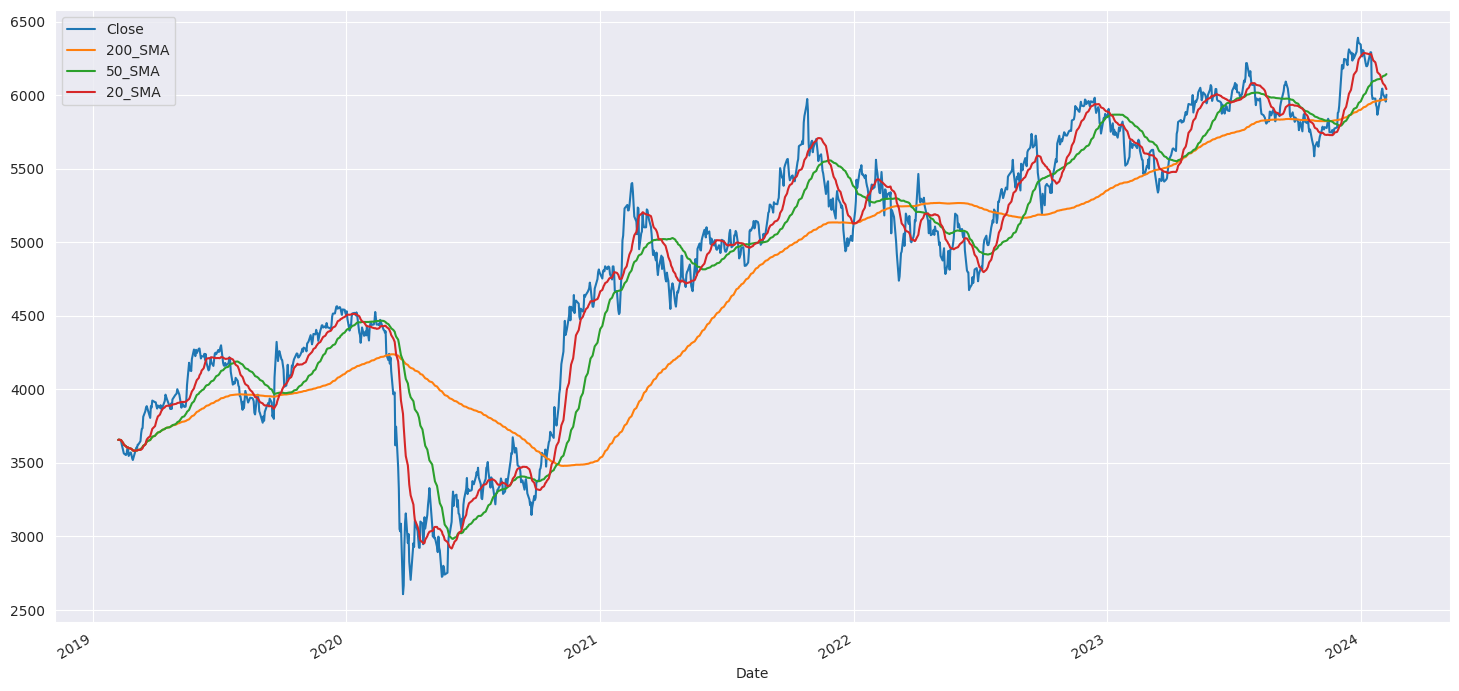

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = sector_df.reset_index()
tmp_df.plot(x='Date', y=['Close','200_SMA','50_SMA','20_SMA'], figsize=(18,9))